In [1]:
import sys
import os
sys.path.append(os.path.abspath('src'))
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from src.approximations import RandomFourierFeatures, NystromApproximation
from src.tasks import KernelRidgeRegression, KernelPCA
from src.utils import GaussianKernel, LaplacianKernel, LinearKernel, CauchyLorentzKernel, PolynomialKernel
from src.utils import center_train_gram_matrix, center_test_gram_matrix, explained_variance_ratio, entropy_of_variance
from src.visualization import plot_kpca, plot_variance_ratio, plot_silhouette_vs_gamma


### ==============================
### Data Preparation
### ==============================
### Generate synthetic dataset

In [2]:
X, y = make_classification(n_samples=500, n_features=20, random_state=42)
X = StandardScaler().fit_transform(X)  # Standardize features

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### ==============================
### Kernel Ridge Regression
### ==============================
### Exact Gaussian Kernel

In [3]:
print("=== Kernel Ridge Regression with Gaussian Kernel ===")
gaussian_kernel = GaussianKernel(gamma=0.5)
model = KernelRidgeRegression(kernel=gaussian_kernel)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Gaussian Kernel): {mse:.2f}')

=== Kernel Ridge Regression with Gaussian Kernel ===
Mean Squared Error (Gaussian Kernel): 0.25


### ==============================
### Kernel Approximation Techniques
### ==============================
### Random Fourier Features

In [4]:
print("\n=== Random Fourier Features Example ===")
rff_model = RandomFourierFeatures(n_components=100, kernel="rbf", gamma=1.0, random_state=42)
X_rff = rff_model.fit_transform(X_train)  # Transform training data
X_test_rff = rff_model.transform(X_test)  # Transform test data

# Fit a logistic regression on the transformed data
clf_rff = LogisticRegression(max_iter=1000, random_state=42)
clf_rff.fit(X_rff, y_train)
y_pred_rff = clf_rff.predict(X_test_rff)
accuracy_rff = clf_rff.score(X_test_rff, y_test)
print(f"Random Fourier Features accuracy: {accuracy_rff:.2f}")



=== Random Fourier Features Example ===
Random Fourier Features accuracy: 0.47


In [6]:
print("\n=== Nyström Approximation Example ===")
nystrom_model = NystromApproximation(n_components=100, kernel="rbf", gamma=0.5, random_state=42)
X_nystrom = nystrom_model.fit_transform(X_train)  # Transform training data
X_test_nystrom = nystrom_model.transform(X_test)  # Transform test data


=== Nyström Approximation Example ===


In [7]:
# Fit a logistic regression on the transformed data
clf_nystrom = LogisticRegression(max_iter=1000, random_state=42)
clf_nystrom.fit(X_nystrom, y_train)
y_pred_nystrom = clf_nystrom.predict(X_test_nystrom)
accuracy_nystrom = clf_nystrom.score(X_test_nystrom, y_test)
print(f"Nyström approximation accuracy: {accuracy_nystrom:.2f}")

Nyström approximation accuracy: 0.45


### ==============================
### Kernel PCA
### ==============================

In [6]:
print("\n=== Kernel PCA ===")
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
kpca = KernelPCA(n_components=2, kernel_func=gaussian_kernel)
X_kpca, eigvals, _ = kpca.fit_transform(X)


=== Kernel PCA ===


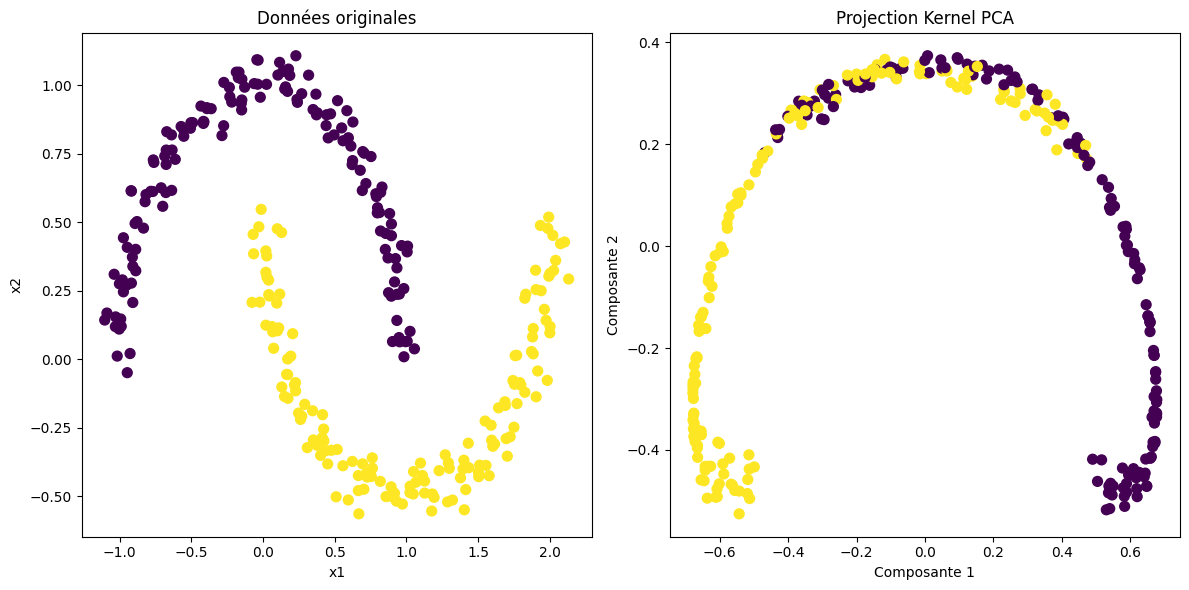

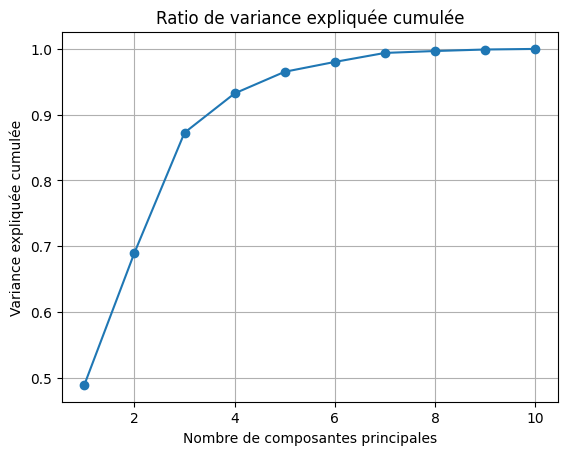

In [7]:
# Visualization
plot_kpca(X, X_kpca, y)
plot_variance_ratio(eigvals, limit=10)

### ==============================
### Kernel Silhouette Analysis
### ==============================


=== Silhouette Analysis for Kernel PCA ===


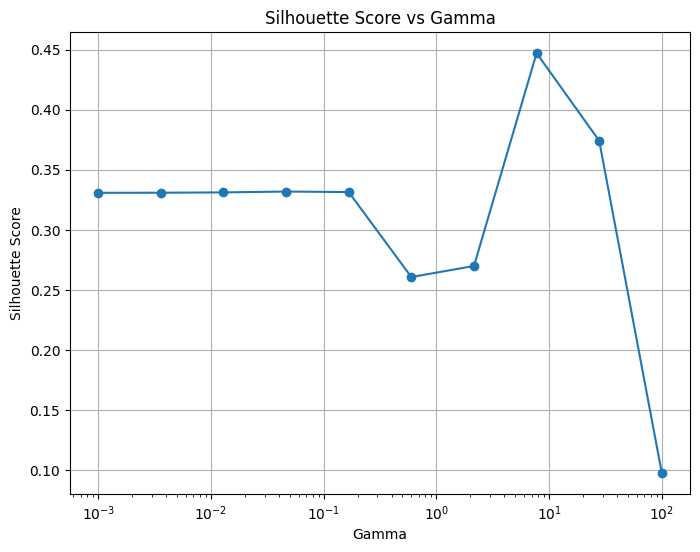

In [8]:
print("\n=== Silhouette Analysis for Kernel PCA ===")
plot_silhouette_vs_gamma(X, y, GaussianKernel, gammas=np.logspace(-3, 2, 10), n_components=2)

### ==============================
### Kernel Functions and Gram Matrices
### ==============================

In [9]:
print("\n=== Kernel Functions and Gram Matrices ===")
# Linear Kernel Example
linear_kernel = LinearKernel()
Kxx_linear = linear_kernel.get_Kxx(X_train)
Kxz_linear = linear_kernel.get_Kxz(X_train, X_test)
print("Linear Kernel Matrix (Train-Train):\n", Kxx_linear[:5, :5])
print("Linear Kernel Matrix (Train-Test):\n", Kxz_linear[:5, :5])



=== Kernel Functions and Gram Matrices ===
Linear Kernel Matrix (Train-Train):
 [[24.55019103  0.13275258  6.14040158  5.6274167  -9.6524114 ]
 [ 0.13275258 20.96274778  0.07431953  2.91003928 -3.85269726]
 [ 6.14040158  0.07431953 10.3746679   7.78843632 -3.23562873]
 [ 5.6274167   2.91003928  7.78843632 15.30631729 -1.7408507 ]
 [-9.6524114  -3.85269726 -3.23562873 -1.7408507  23.79570744]]
Linear Kernel Matrix (Train-Test):
 [[-11.68740946  -4.7363742   -1.69743935  -0.47623624   5.47612902]
 [ 11.75072633  -3.31445404   6.74308108   2.86793786   8.00987545]
 [ -1.92865684  -4.31832254   5.32256675   2.81553906   3.05799668]
 [  0.38480389  -6.09183581  -0.46373761   3.31885286   2.77794351]
 [  3.90934914   1.20396735  -1.28704048   8.24754263  -3.82850542]]


In [10]:
# Entropy of Variance
entropy = entropy_of_variance(explained_variance_ratio(eigvals))
print(f"Entropy of Variance Ratios: {entropy:.2f}")

# End of Notebook

Entropy of Variance Ratios: 5.70
Entropy of Variance Ratios: 5.70
